In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('bank.csv')

In [3]:
data.head()

,NAME,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,Branch,previous,poutcome,deposit
0,GERALDINE,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5.0,may,1042,1.0,-1.0,Airoli,0.0,unknown,yes
1,GIA,56.0,admin.,married,secondary,no,45,no,no,unknown,5.0,may,1467,1.0,-1.0,Airoli,0.0,unknown,yes
2,GIANNA,41.0,technician,married,secondary,no,1270,yes,no,unknown,5.0,may,1389,1.0,-1.0,Airoli,0.0,unknown,yes
3,GISELLE,55.0,services,married,secondary,no,2476,yes,no,unknown,5.0,may,579,1.0,-1.0,Airoli,0.0,unknown,yes
4,GRACE,54.0,admin.,married,tertiary,no,184,no,no,unknown,5.0,may,673,2.0,-1.0,Airoli,0.0,unknown,yes


# client data
1. age -- > Numeric

2. job --> Type of job(categorical)

3. Marital --> Marital status(categorical --> 'single','married','divorced')

4. Education --> categorical --> ('primary','secondary','tertiary','unknown')

5. defalut --> has credit in default(categorical--> 'yes','no','unknown')

6. Housing --> Has housing Loan?(categorical --> 'yes','no')

7. Balance of Individual

# Related to  last contact of current campaign

1. contact --> communication type('cellular','telephone','unknown')

2. Month --> Last contact month of year (categorical)

3. Day --> Last contact day of week(categorical)

4. Duration --> last contact duration in seconds

# Other

1. campaign --> No.of contacts performed during this campaign

2. pdays --> No.od days that passsed after the client was last contacted

3. previous --> No.of contacts performed before this campaign

4. poutcome --> outcome of previous campaign

5. deposit --> output column (categorical)

In [4]:
data.shape

(11166, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NAME       11164 non-null  object 
 1   age        11165 non-null  float64
 2   job        11166 non-null  object 
 3   marital    11166 non-null  object 
 4   education  11164 non-null  object 
 5   default    11166 non-null  object 
 6   balance    11166 non-null  int64  
 7   housing    11166 non-null  object 
 8   loan       11165 non-null  object 
 9   contact    11163 non-null  object 
 10  day        11162 non-null  float64
 11  month      11166 non-null  object 
 12  duration   11166 non-null  int64  
 13  campaign   11163 non-null  float64
 14  pdays      11164 non-null  float64
 15  Branch     11164 non-null  object 
 16  previous   11164 non-null  float64
 17  poutcome   11163 non-null  object 
 18  deposit    11166 non-null  object 
dtypes: float64(5), int64(2), object(12)
memory usa

In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11165.000000,11166.000000,11162.000000,11166.000000,11163.000000,11164.000000,11164.000000
mean,41.234035,1528.045406,15.659380,371.891546,2.508286,51.321032,0.832408
std,11.912810,3224.941157,8.419714,347.109565,2.721993,108.750794,2.291829
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1707.750000,22.000000,496.000000,3.000000,20.250000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
data.isnull().sum()

NAME         2
age          1
job          0
marital      0
education    2
default      0
balance      0
housing      0
loan         1
contact      3
day          4
month        0
duration     0
campaign     3
pdays        2
Branch       2
previous     2
poutcome     3
deposit      0
dtype: int64

In [8]:
data.dropna(inplace = True)

In [9]:
data.isna().sum()

NAME         0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
Branch       0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
data.shape

(11158, 19)

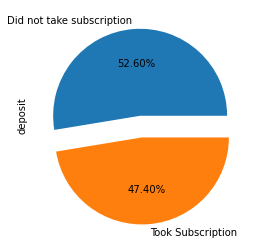

In [11]:
## plotting the percentage of yes or no in deposit column
label = "Did not take subscription","Took Subscription"
data['deposit'].value_counts().plot.pie(explode=[0,0.25],autopct='%1.2f%%',labels=label)


In [12]:
## Exploring the columns

In [13]:
data['job'].value_counts()

management       2566
blue-collar      1942
technician       1823
admin.           1334
services          921
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

<Figure size 1440x360 with 0 Axes>

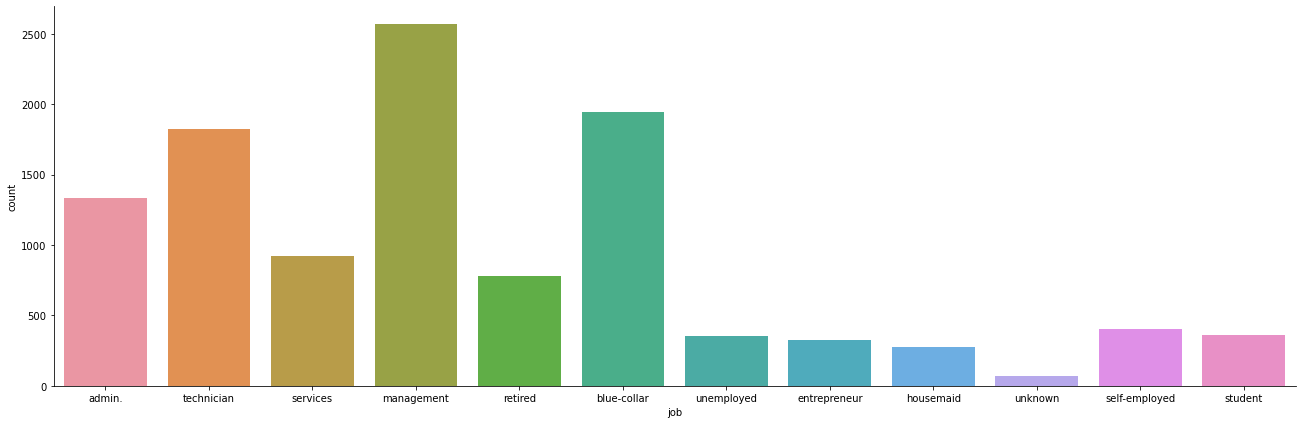

In [14]:
# visualizing job column
plt.figure(figsize=(20,5))
sns.catplot(x='job',kind='count',data=data,height=6, aspect=3,)

In [15]:
# plotting job column with respect to deposit

def plot_graph(column):
    
    temp = pd.DataFrame()
    temp['No Deposit'] =  data[data['deposit'] == 'no'][column].value_counts()
    temp['Yes Depostit'] =  data[data['deposit'] == 'yes'][column].value_counts()
    temp.plot(kind='bar')
    
   
    plt.xlabel(f'{column}')
    plt.ylabel('No.of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.figure(figsize=(12,5))
    plt.show()
    

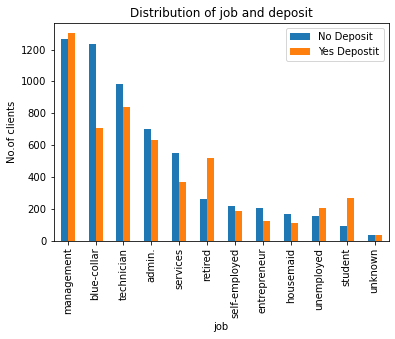

<Figure size 864x360 with 0 Axes>

In [16]:
plot_graph('job')

Occupation--> More no.of people are from management background

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222C99D21C0>,
      dtype=object)

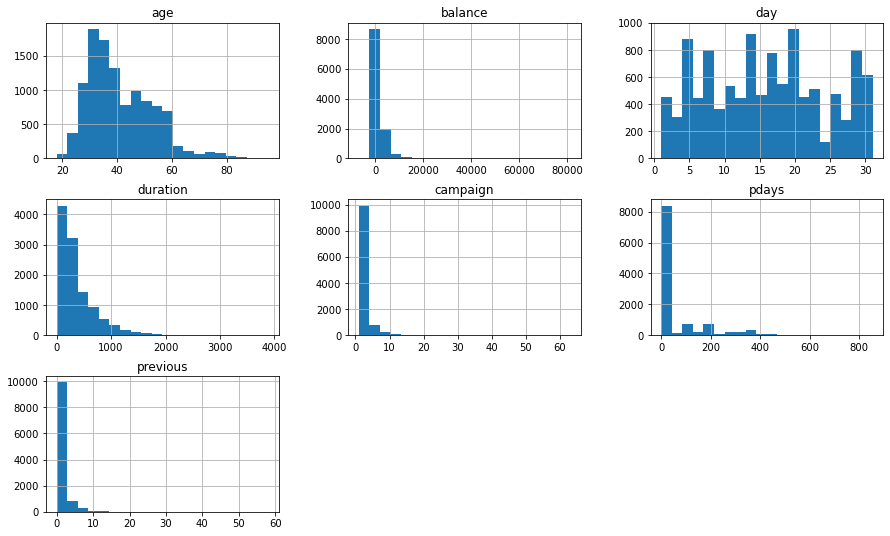

In [17]:
# looking at numeric data
data.hist(bins=20,figsize=(15,9))

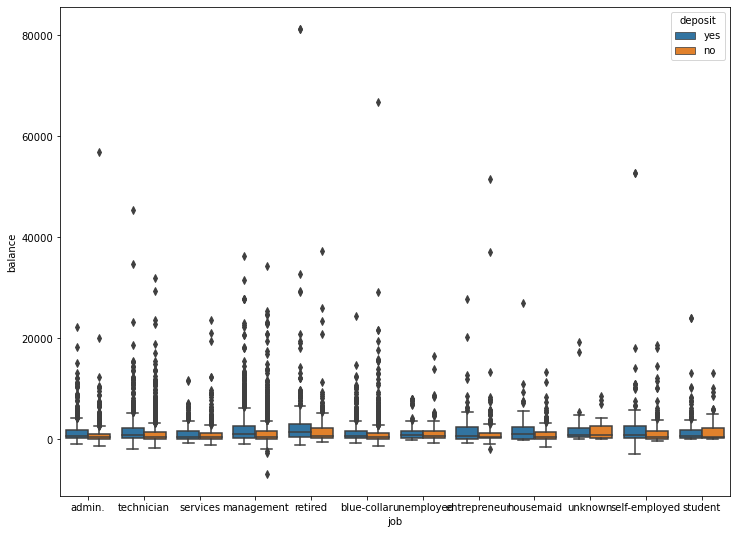

In [18]:
## cheking balance according to age
plt.figure(figsize=(12,9))
sns.boxplot(x="job", y="balance", hue="deposit",data=data)
plt.show()

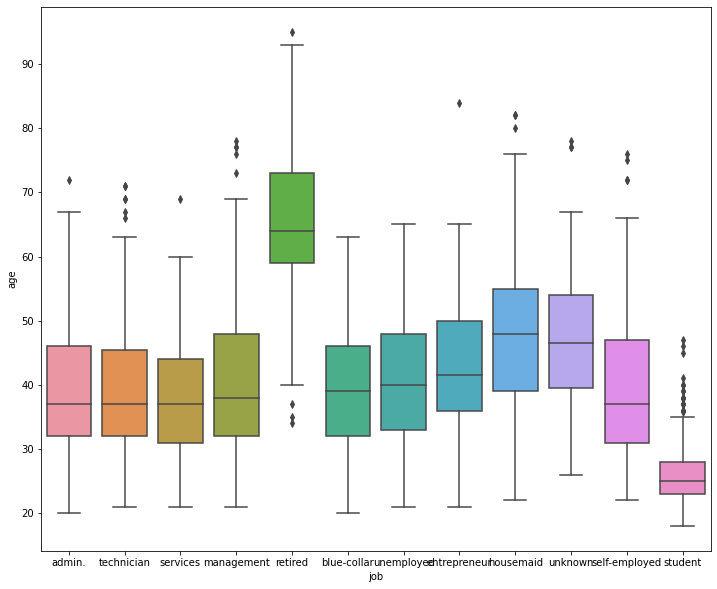

In [19]:
plt.figure(figsize=(12,10))
sns.boxplot(x='job',y='age',data=data)
plt.show()

In [20]:
data['marital'].value_counts()

married     6349
single      3517
divorced    1292
Name: marital, dtype: int64

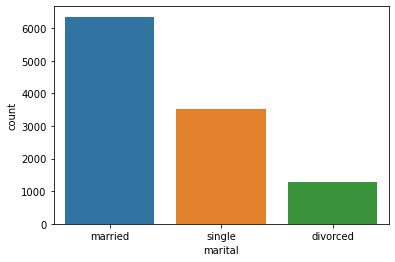

In [21]:
sns.countplot(x='marital',data=data)

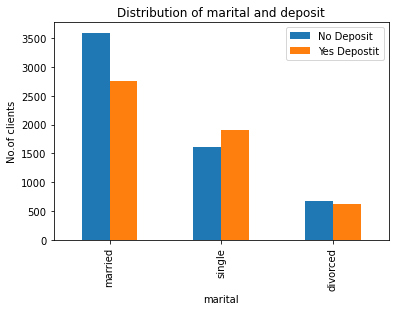

<Figure size 864x360 with 0 Axes>

In [22]:
plot_graph('marital')

In [23]:
data['education'].value_counts()

secondary    5474
tertiary     3689
primary      1500
unknown       495
Name: education, dtype: int64

<Figure size 1440x360 with 0 Axes>

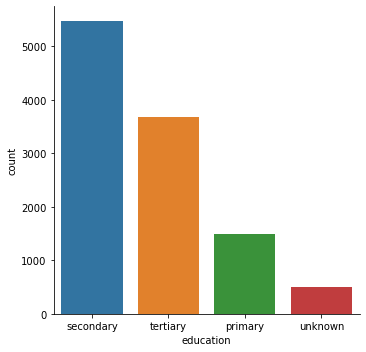

In [24]:
# visualizing education info column
plt.figure(figsize=(20,5))
sns.catplot(x='education',kind='count',data=data)

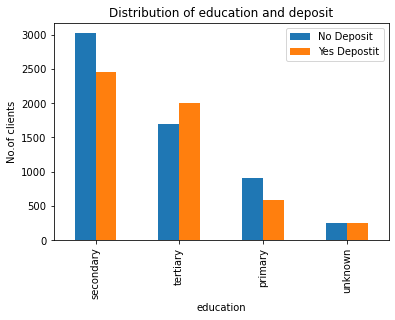

<Figure size 864x360 with 0 Axes>

In [25]:
plot_graph('education')

In [26]:
data['default'].value_counts()

no     10990
yes      168
Name: default, dtype: int64

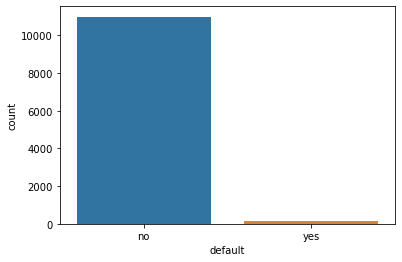

In [27]:
sns.countplot(x='default',data=data)

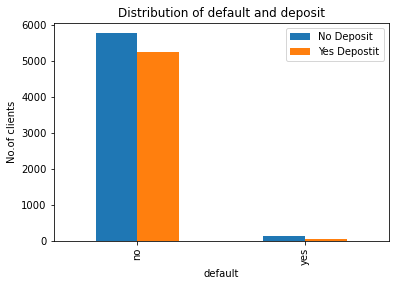

<Figure size 864x360 with 0 Axes>

In [28]:
plot_graph('default')

In [29]:
data['housing'].value_counts()

no     5880
yes    5278
Name: housing, dtype: int64

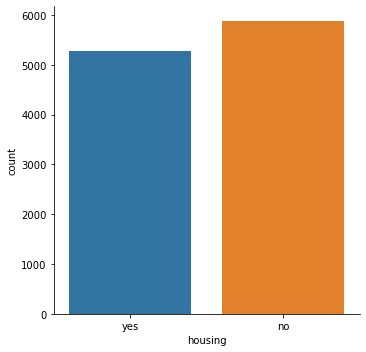

In [30]:
sns.catplot(x='housing',kind='count',data=data)

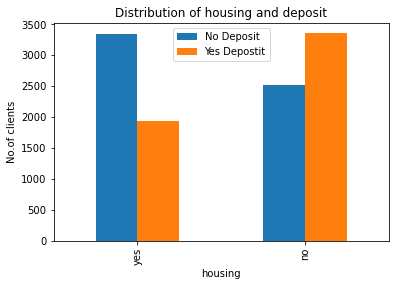

<Figure size 864x360 with 0 Axes>

In [31]:
plot_graph('housing')

In [32]:
data['loan'].value_counts()

no     9700
yes    1458
Name: loan, dtype: int64

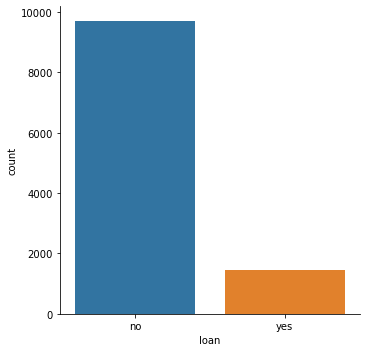

In [33]:
sns.catplot(x='loan',kind='count',data=data)

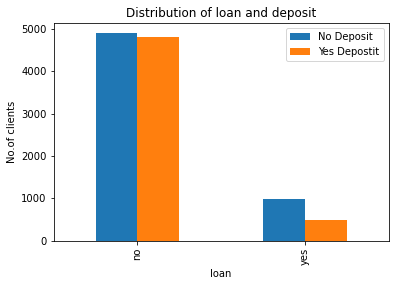

<Figure size 864x360 with 0 Axes>

In [34]:
plot_graph('loan')

In [35]:
data['contact'].value_counts()

cellular     8039
unknown      2345
telephone     774
Name: contact, dtype: int64

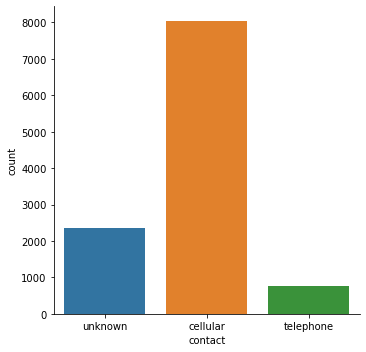

In [36]:
sns.catplot(x='contact',kind='count',data=data)

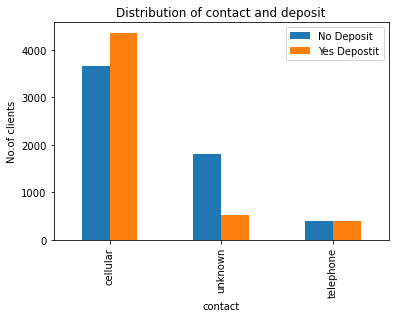

<Figure size 864x360 with 0 Axes>

In [37]:
plot_graph('contact')

In [38]:
data['month'].value_counts()

may    2822
aug    1519
jul    1514
jun    1221
nov     943
apr     923
feb     775
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

<Figure size 1440x360 with 0 Axes>

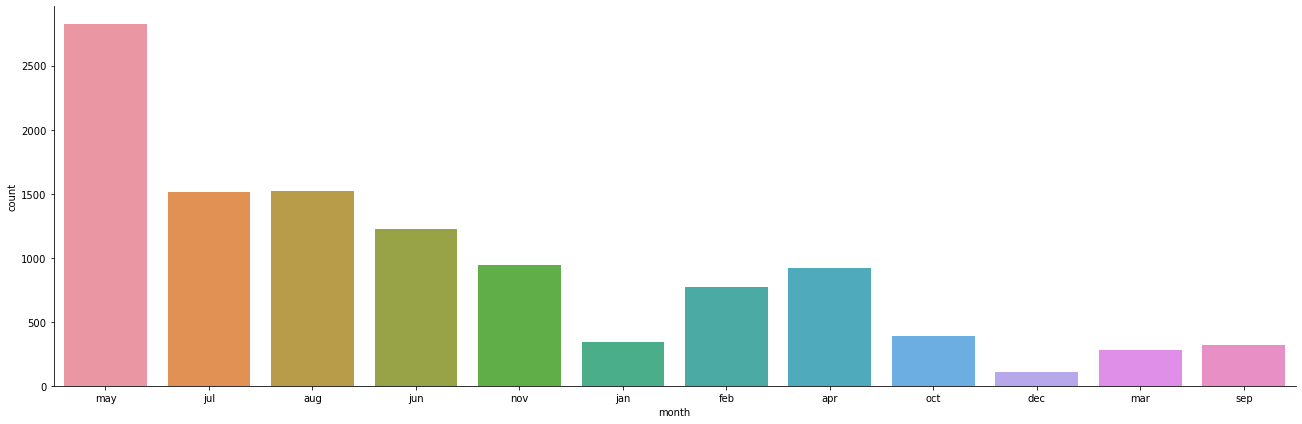

In [39]:
# visualizing Month column
plt.figure(figsize=(20,5))
sns.catplot(x='month',kind='count',data=data.sort_values(by="deposit",ascending=True),height=6, aspect=3)

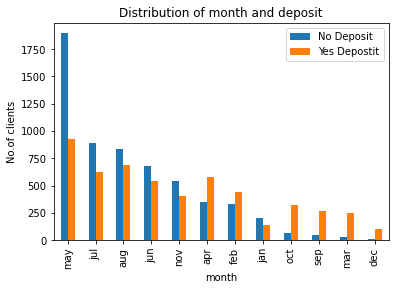

<Figure size 864x360 with 0 Axes>

In [40]:
plot_graph('month')

In [41]:
data['Branch '].value_counts()

Airoli     11158
Name: Branch , dtype: int64

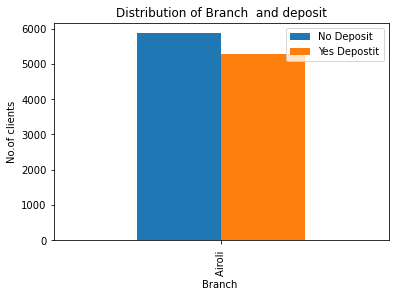

<Figure size 864x360 with 0 Axes>

In [42]:
plot_graph('Branch ')

In [43]:
data['poutcome'].value_counts()

unknown    8322
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

<Figure size 1440x360 with 0 Axes>

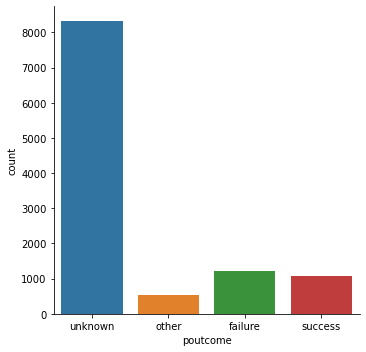

In [44]:
# visualizing poutcome column
plt.figure(figsize=(20,5))
sns.catplot(x='poutcome',kind='count',data=data)

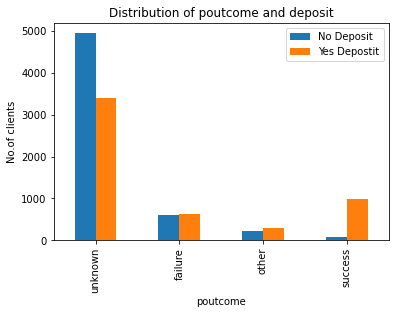

<Figure size 864x360 with 0 Axes>

In [45]:
plot_graph('poutcome')

In [46]:
data['deposit'].value_counts()

no     5869
yes    5289
Name: deposit, dtype: int64

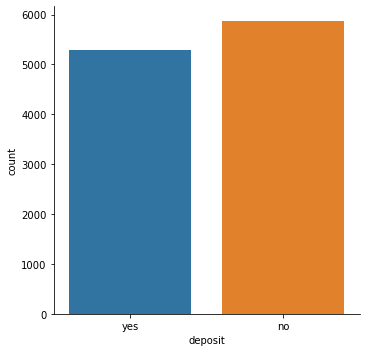

In [47]:
sns.catplot(x='deposit',kind='count',data=data)

In [48]:
data['duration'].nunique()

1428

In [49]:
# Converting the target variable into numeric 

data['deposit'] = data['deposit'].map({'no':0,'yes':1}).astype('uint8')

In [50]:
data.tail()

,NAME,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,Branch,previous,poutcome,deposit
11161,Joel,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20.0,apr,257,1.0,-1.0,Airoli,0.0,unknown,0
11162,John,39.0,services,married,secondary,no,733,no,no,unknown,16.0,jun,83,4.0,-1.0,Airoli,0.0,unknown,0
11163,Jonathan,32.0,technician,single,secondary,no,29,no,no,cellular,19.0,aug,156,2.0,-1.0,Airoli,0.0,unknown,0
11164,Jordan,43.0,technician,married,secondary,no,0,no,yes,cellular,8.0,may,9,2.0,172.0,Airoli,5.0,failure,0
11165,Joseph,34.0,technician,married,secondary,no,0,no,no,cellular,9.0,jul,628,1.0,-1.0,Airoli,0.0,unknown,0


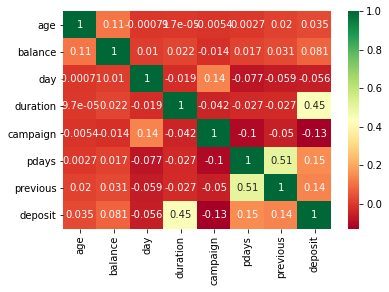

In [51]:
# Bulding Correlation Matrix

sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

# Handling categorical Data

In [52]:
data.head(4)

,NAME,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,Branch,previous,poutcome,deposit
0,GERALDINE,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5.0,may,1042,1.0,-1.0,Airoli,0.0,unknown,1
1,GIA,56.0,admin.,married,secondary,no,45,no,no,unknown,5.0,may,1467,1.0,-1.0,Airoli,0.0,unknown,1
2,GIANNA,41.0,technician,married,secondary,no,1270,yes,no,unknown,5.0,may,1389,1.0,-1.0,Airoli,0.0,unknown,1
3,GISELLE,55.0,services,married,secondary,no,2476,yes,no,unknown,5.0,may,579,1.0,-1.0,Airoli,0.0,unknown,1


In [53]:
Job = data[['job']]

In [54]:
Job

,job
0,admin.
1,admin.
2,technician
3,services
4,admin.
...,...
11161,blue-collar
11162,services
11163,technician
11164,technician


In [55]:
Job = pd.get_dummies(Job,drop_first=True)

In [56]:
Job.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [57]:
# 2. Marital
data['marital'].value_counts()

married     6349
single      3517
divorced    1292
Name: marital, dtype: int64

In [58]:
Mar = data[['marital']]

In [59]:
Mar.head()

,marital
0,married
1,married
2,married
3,married
4,married


In [60]:
Marital = pd.get_dummies(Mar,drop_first=True)

In [61]:
Marital.head()

,marital_married,marital_single
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [62]:
## 3. Education

edu = data[['education']]

In [63]:
edu

,education
0,secondary
1,secondary
2,secondary
3,secondary
4,tertiary
...,...
11161,primary
11162,secondary
11163,secondary
11164,secondary


In [64]:
Education = pd.get_dummies(edu,drop_first=True)

In [65]:
Education.head()

,education_secondary,education_tertiary,education_unknown
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [66]:
# 4 . Default

defa = data[['default']]

In [67]:
Default = pd.get_dummies(defa,drop_first=True)

In [68]:
Default.tail()

,default_yes
11161,0
11162,0
11163,0
11164,0
11165,0


In [69]:
# 5. Housing
house = data[['housing']]

In [70]:
Housing = pd.get_dummies(house,drop_first=True)

In [71]:
Housing.head()

,housing_yes
0,1
1,0
2,1
3,1
4,0


In [72]:
# 6.Loan
loan = data['loan']

In [73]:
Loan = pd.get_dummies(loan,drop_first=True)

In [74]:
Loan.tail()

,yes
11161,0
11162,0
11163,0
11164,1
11165,0


In [75]:
# 7. Contact 
con = data['contact']

In [76]:
Contact = pd.get_dummies(con,drop_first=True)

In [77]:
Contact.head()

,telephone,unknown
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [78]:
Contact['cunknown'] = Contact.unknown

In [79]:
Contact.head()

,telephone,unknown,cunknown
0,0,1,1
1,0,1,1
2,0,1,1
3,0,1,1
4,0,1,1


In [80]:
Contact.drop(['unknown'],inplace=True,axis=1)

In [81]:
Contact.head()

,telephone,cunknown
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [82]:
# 8. Month
mon = data['month']
Month = pd.get_dummies(mon,drop_first=True)

In [83]:
Month.tail()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
11161,0,0,0,0,0,0,0,0,0,0,0
11162,0,0,0,0,0,1,0,0,0,0,0
11163,1,0,0,0,0,0,0,0,0,0,0
11164,0,0,0,0,0,0,0,1,0,0,0
11165,0,0,0,0,1,0,0,0,0,0,0


In [84]:
# 9.Branch
data['Branch '].value_counts()

Airoli     11158
Name: Branch , dtype: int64

In [85]:
branch = data['Branch ']
branch = pd.get_dummies(branch)

In [86]:
branch.head()

,Airoli
0,1
1,1
2,1
3,1
4,1


In [87]:
# Poutcome

out = data['poutcome']

In [88]:
Poutcome = pd.get_dummies(out,drop_first=True)

In [89]:
Poutcome.head()

,other,success,unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [90]:
Poutcome['Punknown'] = Poutcome['unknown']

In [91]:
Poutcome.head()

,other,success,unknown,Punknown
0,0,0,1,1
1,0,0,1,1
2,0,0,1,1
3,0,0,1,1
4,0,0,1,1


In [92]:
Poutcome.drop(['unknown'],axis=1,inplace=True)

In [93]:
Poutcome.head()

,other,success,Punknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [94]:
data.head()

,NAME,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,Branch,previous,poutcome,deposit
0,GERALDINE,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5.0,may,1042,1.0,-1.0,Airoli,0.0,unknown,1
1,GIA,56.0,admin.,married,secondary,no,45,no,no,unknown,5.0,may,1467,1.0,-1.0,Airoli,0.0,unknown,1
2,GIANNA,41.0,technician,married,secondary,no,1270,yes,no,unknown,5.0,may,1389,1.0,-1.0,Airoli,0.0,unknown,1
3,GISELLE,55.0,services,married,secondary,no,2476,yes,no,unknown,5.0,may,579,1.0,-1.0,Airoli,0.0,unknown,1
4,GRACE,54.0,admin.,married,tertiary,no,184,no,no,unknown,5.0,may,673,2.0,-1.0,Airoli,0.0,unknown,1


In [95]:
data.drop(['NAME','job','marital','education','default','housing','loan','contact','month','Branch ','poutcome'],
          axis=1,inplace=True)

In [96]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,deposit
0,59.0,2343,5.0,1042,1.0,-1.0,0.0,1
1,56.0,45,5.0,1467,1.0,-1.0,0.0,1
2,41.0,1270,5.0,1389,1.0,-1.0,0.0,1
3,55.0,2476,5.0,579,1.0,-1.0,0.0,1
4,54.0,184,5.0,673,2.0,-1.0,0.0,1


In [97]:
train_data = pd.concat([data,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Poutcome],axis=1)

In [98]:
train_data.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,jul,jun,mar,may,nov,oct,sep,other,success,Punknown
0,59.0,2343,5.0,1042,1.0,-1.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56.0,45,5.0,1467,1.0,-1.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41.0,1270,5.0,1389,1.0,-1.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55.0,2476,5.0,579,1.0,-1.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54.0,184,5.0,673,2.0,-1.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [99]:
train_data.shape

(11158, 43)

In [100]:
train_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'yes', 'telephone', 'cunknown', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'other', 'success',
       'Punknown'],
      dtype='object')

In [101]:
train_data.tail()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,jul,jun,mar,may,nov,oct,sep,other,success,Punknown
11161,33.0,1,20.0,257,1.0,-1.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11162,39.0,733,16.0,83,4.0,-1.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11163,32.0,29,19.0,156,2.0,-1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11164,43.0,0,8.0,9,2.0,172.0,5.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11165,34.0,0,9.0,628,1.0,-1.0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


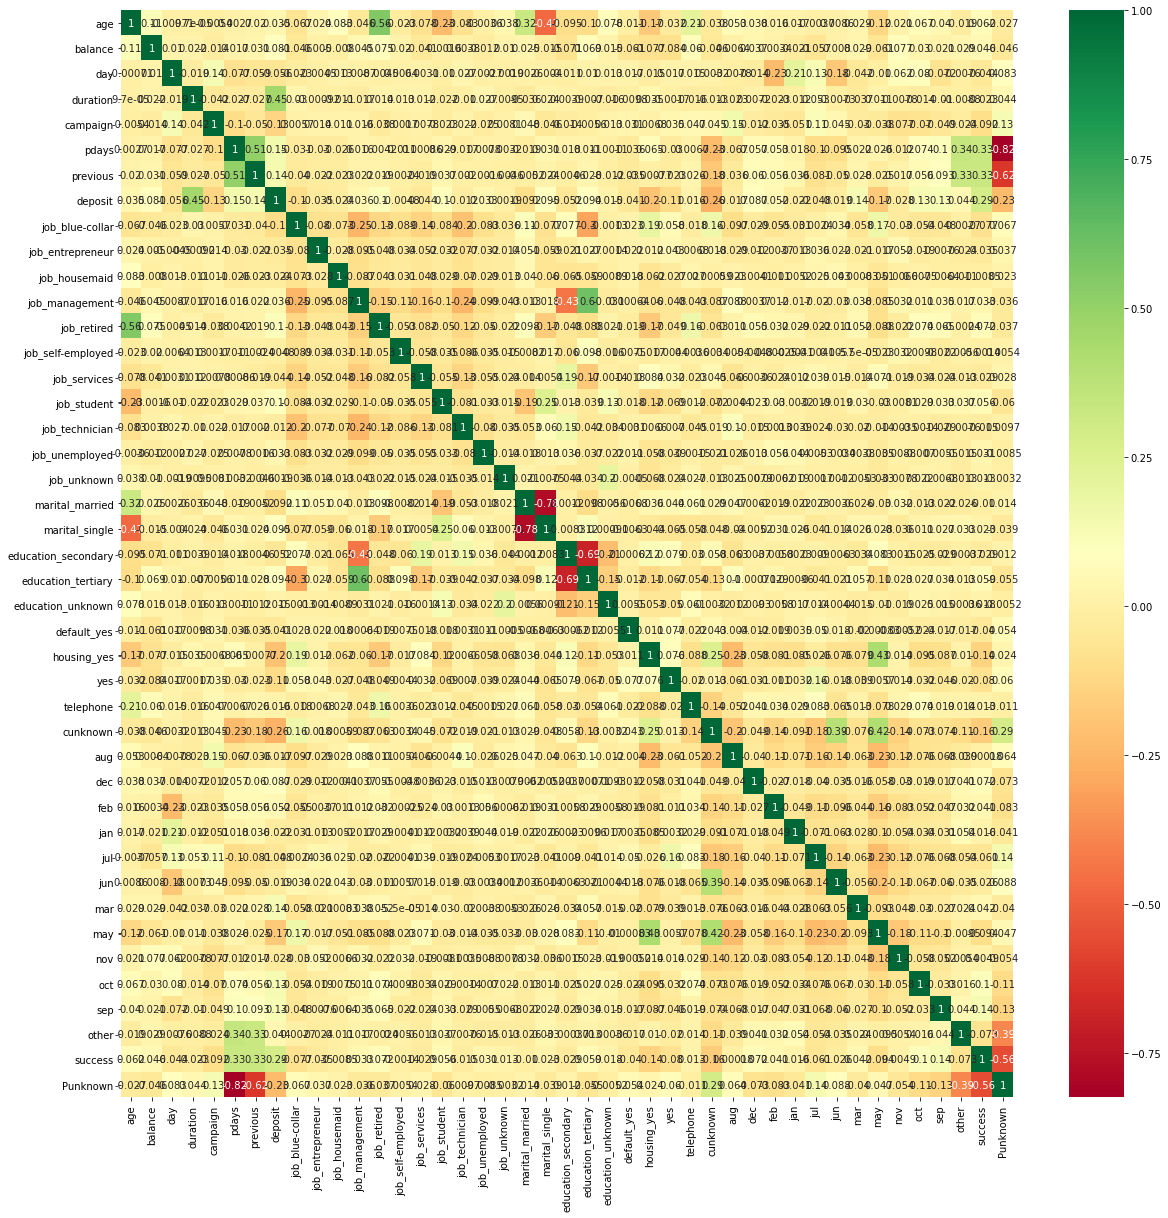

In [102]:
plt.figure(figsize=(20,20))
#plotting heatmap

sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")

In [103]:
train_data.shape

(11158, 43)

In [104]:
train_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'yes', 'telephone', 'cunknown', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'other', 'success',
       'Punknown'],
      dtype='object')

In [105]:
X = train_data.loc[:,['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'yes', 'telephone', 'cunknown', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'other', 'success',
       'Punknown']]

In [106]:
X.shape

(11158, 42)

In [107]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,jul,jun,mar,may,nov,oct,sep,other,success,Punknown
0,59.0,2343,5.0,1042,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56.0,45,5.0,1467,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41.0,1270,5.0,1389,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55.0,2476,5.0,579,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54.0,184,5.0,673,2.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [108]:
y = train_data.iloc[:,7]

In [109]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11161    0
11162    0
11163    0
11164    0
11165    0
Name: deposit, Length: 11158, dtype: uint8

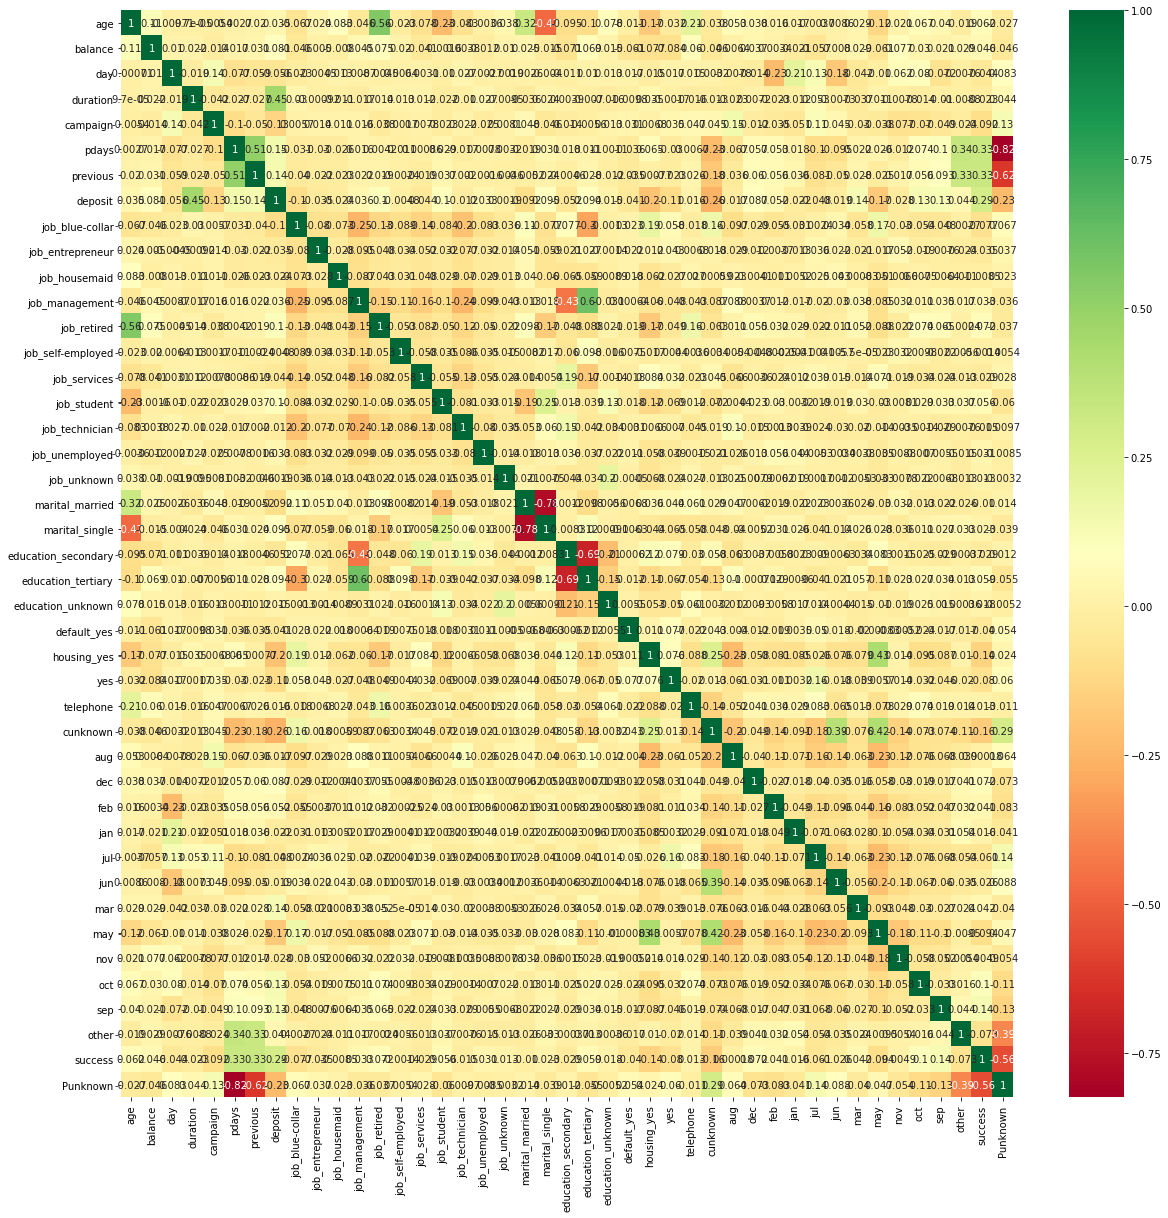

In [110]:
plt.figure(figsize=(20,20))
#plotting heatmap

sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")

In [111]:
from sklearn.ensemble import ExtraTreesRegressor
selection =  ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [112]:
print(selection.feature_importances_)

[0.04532008 0.04399769 0.07187998 0.33119888 0.03397175 0.01564054
 0.01108818 0.01021239 0.0046757  0.00315562 0.01116603 0.00622053
 0.0044427  0.00697164 0.00647883 0.01108658 0.00484229 0.00157844
 0.0121798  0.01113248 0.01245676 0.01163288 0.00607571 0.00191595
 0.02605992 0.0125081  0.00831804 0.04550668 0.01793864 0.00207705
 0.01109956 0.00992932 0.01846573 0.01029158 0.0115138  0.01109657
 0.01300703 0.01090452 0.00560165 0.00552455 0.08367333 0.0171625 ]


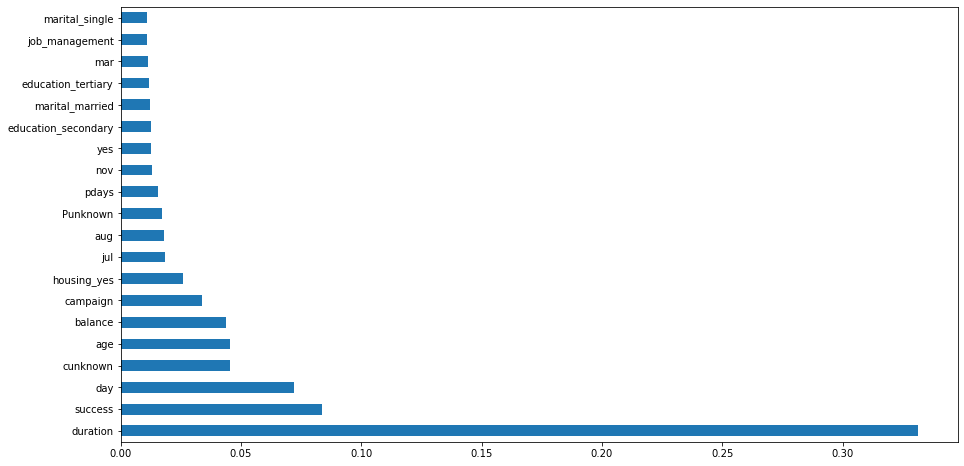

In [113]:

plt.figure(figsize=(15,8))
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [115]:
from sklearn.ensemble import RandomForestClassifier
class_rf = RandomForestClassifier()
class_rf.fit(X_train,y_train)

RandomForestClassifier()

In [116]:
y_pred = class_rf.predict(X_test)

In [117]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [118]:
class_rf.score(X_test,y_test)

0.8561827956989247

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
class_xg = GradientBoostingClassifier()
class_xg.fit(X_train,y_train)

GradientBoostingClassifier()

In [121]:
ypred = class_xg.predict(X_test)

In [122]:
ypred

array([0, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [123]:
class_xg.score(X_test,y_test)

0.8508064516129032

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from random import randint

In [128]:
random_grid = {'n_estimators':[100,200,300,400,500],
                'max_depth': [3,5,10,None],
               'criterion':['gini','entropy'], 
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf':[1,2,5,10]} # minimum sample leaf can be between 1 to 4

In [129]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = class_rf, param_distributions = random_grid, 
                               n_iter = 10, cv = 5, verbose=2, 
                               random_state=42, n_jobs = 1)

In [130]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_depth=10, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_depth=10, criterion=entropy, total=   0.9s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_depth=10, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_depth=10, criterion=entropy, total=   1.0s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_depth=10, criterion=entropy 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_depth=10, criterion=entropy, total=   0.9s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_depth=10, criterion=entropy 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_depth=10, criterion=entropy, total=   0.9s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_depth=10, criterion=entropy 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_depth=10, criterion=entropy, total=   0.9s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_depth=10, criterion=entropy 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_depth=10, criterion=entropy, total=   1.5s
[CV] n_estimators=300, min_sa

[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=None, criterion=entropy, total=   0.7s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=None, criterion=entropy 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=None, criterion=entropy, total=   0.7s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=None, criterion=entropy 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=None, criterion=entropy, total=   0.8s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=None, criterion=entropy 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=None, criterion=entropy, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_depth=3, criterion=entropy 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=5, max_depth=3, criterion=entropy, total=   0.6s
[CV] n_estimators=200, min_sample

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   47.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [131]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': None,
 'criterion': 'entropy'}

In [142]:
classifier = RandomForestClassifier(n_estimators= 100,
 min_samples_split = 10,
 min_samples_leaf = 5,
 max_depth = None,
 criterion= 'entropy')

In [145]:
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=10)

In [146]:
pred = classifier.predict(X_test)

In [147]:
classifier.score(X_test,y_test)

0.8539426523297491

In [148]:
pred

array([0, 1, 1, ..., 0, 0, 0], dtype=uint8)